# Part 3

# Read Data

We are first reading in the SOTU.csv and setting it to 'sou'.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark') 

In [42]:
sou = pd.read_csv('data/SOTU.csv')
sou

President    Year  \
0      Joseph R. Biden  2024.0   
1      Joseph R. Biden  2023.0   
2      Joseph R. Biden  2022.0   
3      Joseph R. Biden  2021.0   
4      Donald J. Trump  2020.0   
..                 ...     ...   
241  George Washington  1791.0   
242  George Washington  1790.0   
243  George Washington  1790.0   
244  George Washington  1790.0   
245  George Washington  1790.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

# Load en_core_web_sm

We also want to load in en_core_web_sm

In [43]:
import spacy
from tqdm import tqdm
from collections import Counter

nlp = spacy.load("en_core_web_sm")

# LDA:  
For this first part, we want to train an LDA model on our data. We preprocess our text, train the LDA model, and perform EDA.

# Load imports

In [44]:
from spacy import displacy
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.gensim_models

# Preprocess the text

In [45]:
def preprocess_text(text): 
    doc = nlp(text) 
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and len(token.lemma_) > 3]

processed_docs = sou['Text'].apply(preprocess_text)
print(processed_docs.head())

0                                                    [speak, president, present, prepared, remark, speaker, house, representatives, michael, johnson, president, bedtime, read, tony, thank, look, jill, good, evening, good, evening, smart, home, laughter, speaker, madam, vice, president, members, congress, fellow, americans, january, 1941, franklin, roosevelt, come, chamber, speak, nation, address, moment, unprecedented, history, union, hitler, march, rage, europe, president, roosevelt, purpose, wake, congress, alert, american, people, ordinary, time, freedom, democracy, assault, world, tonight, come, chamber, address, nation, face, unprecedented, moment, history, union, purpose, tonight, wake, congress, alert, american, people, ordinary, moment, president, lincoln, civil, freedom, democracy, assault, home, today, make, moment, rare, freedom, democracy, attack, home, overseas, time, overseas, ...]
1                                                  [president, speaker, point, president, t

# Create a dictionary and corpus

In [46]:
dictionary = Dictionary(processed_docs)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train the LDA model w/ 18 topics

In [47]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=18, random_state=42, passes=10)

# Print the top 10 words for each topic

In [48]:
lda_model.print_topics(-1)

[(0,
  '0.004*"cent" + 0.004*"june" + 0.004*"gold" + 0.003*"island" + 0.003*"silver" + 0.003*"bond" + 0.003*"method" + 0.003*"convention" + 0.003*"indian" + 0.003*"note"'),
 (1,
  '0.008*"depression" + 0.007*"program" + 0.007*"recovery" + 0.006*"budget" + 0.006*"unemployment" + 0.006*"loan" + 0.006*"activity" + 0.006*"farm" + 0.005*"emergency" + 0.005*"cent"'),
 (2,
  '0.008*"dictator" + 0.005*"expression" + 0.004*"british" + 0.004*"1914" + 0.003*"impressive" + 0.003*"actual" + 0.003*"revolution" + 0.003*"schedule" + 0.003*"continent" + 0.003*"partisanship"'),
 (3,
  '0.008*"forest" + 0.007*"corporation" + 0.005*"judge" + 0.005*"wrong" + 0.005*"interstate" + 0.004*"employee" + 0.003*"bureau" + 0.003*"body" + 0.003*"mountain" + 0.003*"island"'),
 (4,
  '0.017*"program" + 0.014*"soviet" + 0.009*"1980" + 0.009*"u.s." + 0.008*"area" + 0.007*"major" + 0.006*"goal" + 0.006*"commitment" + 0.006*"challenge" + 0.006*"nuclear"'),
 (5,
  '0.015*"americans" + 0.014*"tonight" + 0.007*"thank" + 0.00

For each of these topics, we see the top 10 words that are most highly associated with each topic. Each word in the topic is multiplied by a weight, which signifies it's contribution to the topic. Words that are more highly associated with a topic have higher weights.

# Print the topic distribution for the 1st speech

In [49]:
lda_model[corpus][0]

[(11, np.float32(0.99942815))]

Looking at the output, we see that the first speech has a ~99.94% chance of being associated with topic 11.

# Visualization

In [50]:
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

In [51]:
pyLDAvis.save_html(lda_display, 'outputs/lda.html')

# BERTopic:  
Next, we will train the BERTopic model on our dataset.

# Train the BERTopic model

In [52]:
docs = sou['Text'].to_list()

topic_model = BERTopic(min_topic_size=3)
topics, probs = topic_model.fit_transform(docs)

stop_words = CountVectorizer(stop_words='english')
topic_model.update_topics(docs, vectorizer_model=stop_words)

# Output top 10 words for each topic

In [53]:
# output the top 10 words for each topic - hint see get_topic_info
topic_model.get_topic_info()[['Topic', 'Representation']]

,Topic,Representation
0,-1,"[government, states, united, congress, year, public, country, war, great, people]"
1,0,"[world, new, years, people, year, america, american, congress, nations, federal]"
2,1,"[america, people, new, americans, american, tonight, jobs, years, world, know]"
3,2,"[states, government, united, public, congress, country, mexico, great, war, present]"
4,3,"[states, government, united, department, congress, shall, great, public, country, law]"
5,4,"[government, work, public, congress, great, law, country, national, people, states]"
6,5,"[world, nations, soviet, peace, economic, free, military, defense, nation, people]"
7,6,"[states, government, united, congress, great, public, constitution, country, year, people]"
8,7,"[states, government, constitution, country, general, state, united, bank, public, people]"
9,8,"[government, states, statute, law, united, congress, american, great, foreign, new]"


We see the top 10 words with the greatest probability of being associated with each topic.

# Topic distribution for the 1st speech

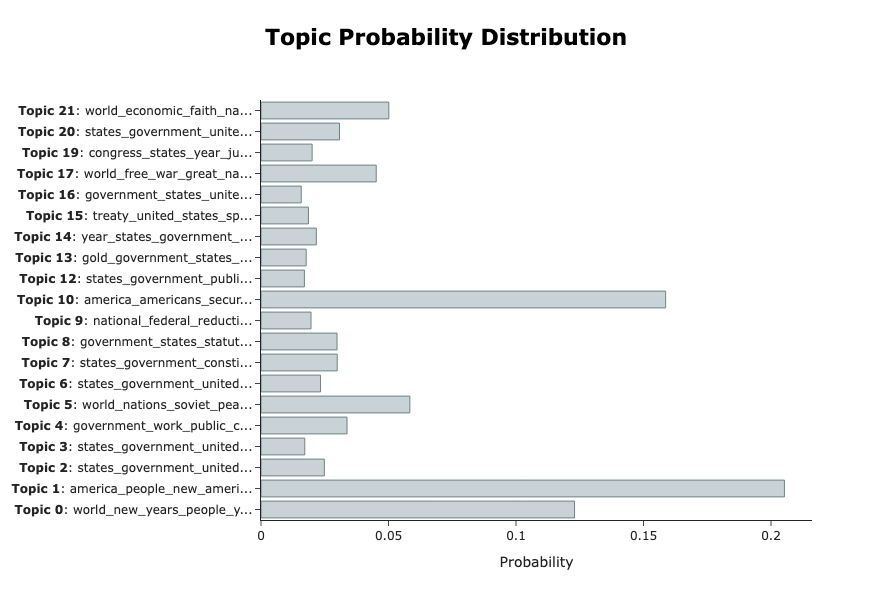

In [54]:
topic_distr, topic_token_distr = topic_model.approximate_distribution(docs)
grph = topic_model.visualize_distribution(topic_distr[0])
grph

In [55]:
grph.write_html("outputs/topic_prob_distr.html")

We see that the first speech has around a 17% chance of being about topic 2 and around a 20% chance of being about topics 1 and a 15% chance of being about topic 10 and 0. This is interesting as from the LDA model, we saw the first speech has having a 99.97% chance of being about topic 7. The LDA model was extremely confident that the 1st speech was associated with topic 7 but compared to the results of the BERTopic model, the BERTopic model is pretty split between ~3 topics. 

# Visualization

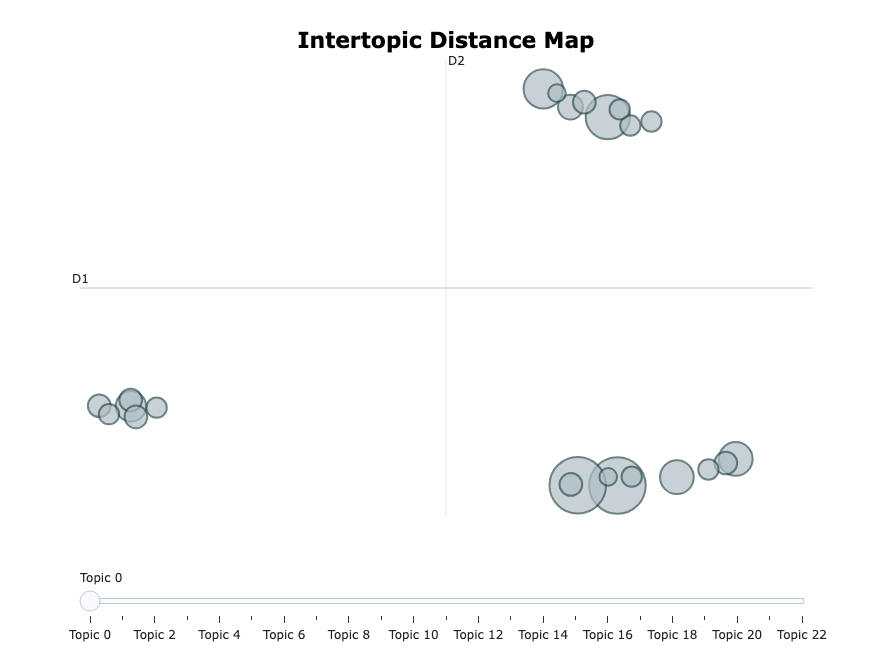

In [56]:
# run this cell to visualize the topics
grph2 = topic_model.visualize_topics()
grph2

In [31]:
grph2.write_html("outputs/intertopic_distance_map.html")